In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
for dirname, _, filename in os.walk("/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020"):
  for files in filename:
    print(os.path.join(dirname, files))

/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/sample_submission.csv
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/test.csv
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/train.csv
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/Train_374.jpg
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/Train_373.jpg
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/Train_366.jpg
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/Train_375.jpg
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/Train_365.jpg
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/Train_359.jpg
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/Train_396.jpg
/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/Train_368.jpg
/content/gdrive/My Dr

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
from tqdm import tqdm_notebook as tqdm

In [0]:
train_data = pd.DataFrame(pd.read_csv("/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/train.csv"))
test_data = pd.DataFrame(pd.read_csv("/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/test.csv"))

In [5]:
print("Training data shape : = {}".format(train_data.shape))
print("Test data shape : = {}".format(test_data.shape))

Training data shape : = (1821, 5)
Test data shape : = (1821, 1)


In [6]:
test_data.head()

image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

In [0]:
image_folder_path = "/content/gdrive/My Drive/Datasets/Plant Diseases/Plant Pathology 2020/images/"

In [0]:
arr = train_data["image_id"]
train_images = [i for i in arr]  

arr = test_data["image_id"]
test_images = [i for i in arr]

In [9]:
print("Number of training images = {}".format(len(train_images)))
print("Number of test images = {}".format(len(test_images)))

Number of training images = 1821
Number of test images = 1821


In [0]:
def load_image(image_id) : 
  image_path = image_folder_path +image_id +".jpg"
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

An image is essentially a numpy array of values. To bring all the images to one same dimensions(that is a 3D tensor) we resize them.

In [0]:
def resize(image):
  image = cv2.resize(image, (800, 800))
  return image

For analysis purpose on a Jupyter notebook - *as the images are from the same distribution* - we will use only a thousand images(RAM constraints) for our Exploratory Data Analysis

In [12]:
train_images = [load_image(i) for i in tqdm(train_images[: 1000])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [0]:
sample_img = train_images[40]

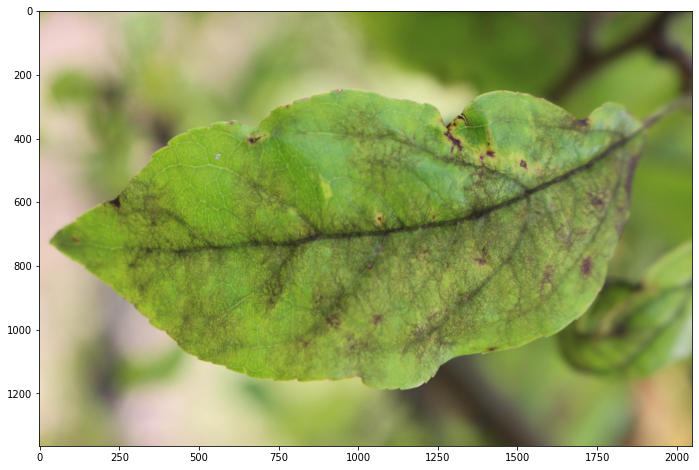

In [14]:
plt.figure(figsize = (12, 8))
plt.imshow(sample_img)

##**Analysing Color distribution in a sample of RGB images**

In [15]:
red = [np.mean(train_images[i][:, :, 0]) for i in tqdm(range(len(train_images)))] 
green = [np.mean(train_images[i][:, :, 1]) for i in tqdm(range(len(train_images)))] 
blue = [np.mean(train_images[i][:, :, 2]) for i in tqdm(range(len(train_images)))] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


The range of spread = 103.71


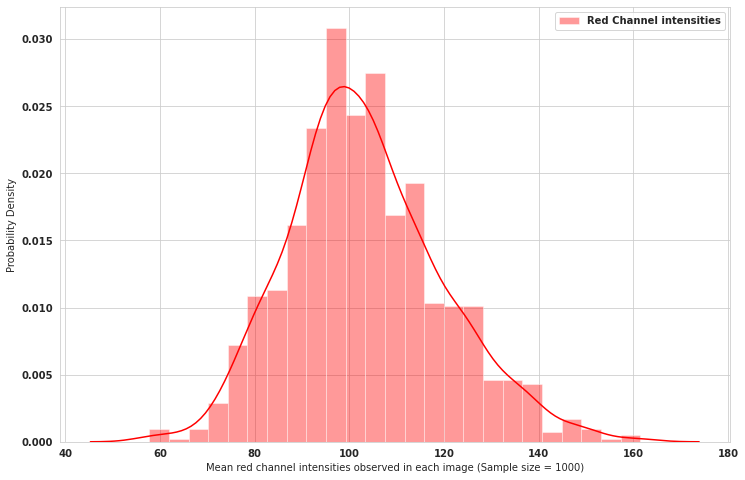

In [16]:
# red channel plot
range_of_spread = max(red) - min(red)
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(red,  hist = True, kde = True, label = "Red Channel intensities", color = "r")
fig.set(xlabel = "Mean red channel intensities observed in each image (Sample size = 1000)", ylabel = "Probability Density")
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

The range of spread = 98.12


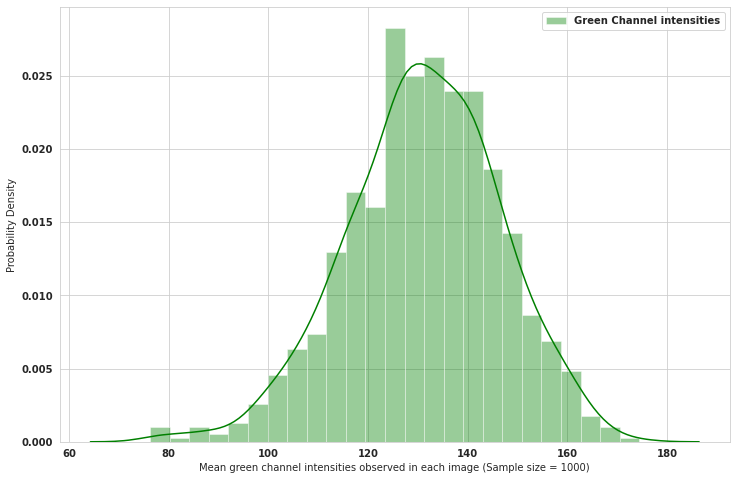

In [17]:
# Green channel plot
range_of_spread = max(green) - min(green)
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(green,  hist = True, kde = True, label = "Green Channel intensities", color = "g")
fig.set(xlabel = "Mean green channel intensities observed in each image (Sample size = 1000)", ylabel = "Probability Density")
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

The range of spread = 101.64


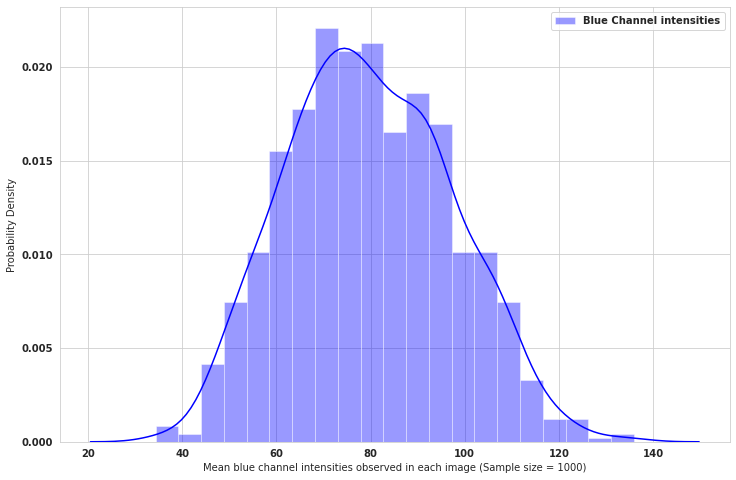

In [18]:
# Blue channel plot
range_of_spread = max(blue) - min(blue)
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(blue,  hist = True, kde = True, rug = False, label = "Blue Channel intensities", color = "b")
fig.set(xlabel = "Mean blue channel intensities observed in each image (Sample size = 1000)", ylabel = "Probability Density")
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

#### **Inference** 



*   Red channel has positive skew, meaning the values are more concentrated at intensities lower than mean(somewhere around 90).
*   Green channel is negative skew, meaning the values are more concentrated at intentities higher than mean(somewhere in the range 130-150). This also means that green channel is more pronounced than red in the sample image set; and thereby the whole data set as they come from the same distribution. 
This makes sense as images are that of leaves!


*   Similarily, blue channel has a slight positive skew and is very well distributed.


### **Visualizing Images of different classes**

Categories in our training data set : 

*   Healthy
*   Multiple_diseases

*   Rust
*   Scab







In [19]:
train_data.head()

image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [20]:
def extract_classes(s):
  """
  s can be either of the four classes mentioned above.
  """ 
  t = train_data[train_data[s] == 1] 
  arr = t["image_id"]
  images = [i for i in tqdm(arr)]
  return images

s = ["healthy", "multiple_diseases", "rust", "scab"]
images = extract_classes(s[0])
train_images_healthy = [load_image(i) for i in tqdm(images[:10])]

images = extract_classes(s[1])
train_images_diseased = [load_image(i) for i in tqdm(images[:10])]

images = extract_classes(s[2])
train_images_rust = [load_image(i) for i in tqdm(images[:10])]

images = extract_classes(s[3])
train_images_scab = [load_image(i) for i in tqdm(images[:10])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


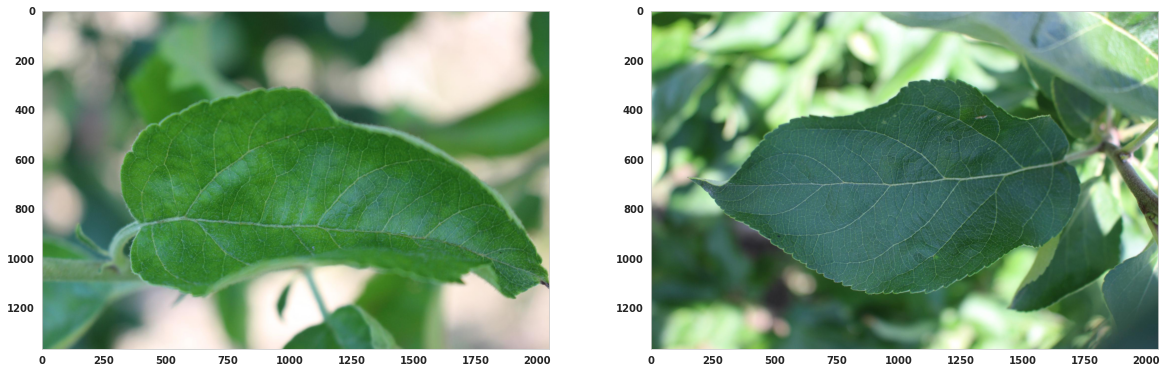

In [47]:
# healthy leaves
plt, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 12))
ax1.imshow(train_images_healthy[0])
ax1.grid(False)
ax2.imshow(train_images_healthy[5])
ax2.grid(False)

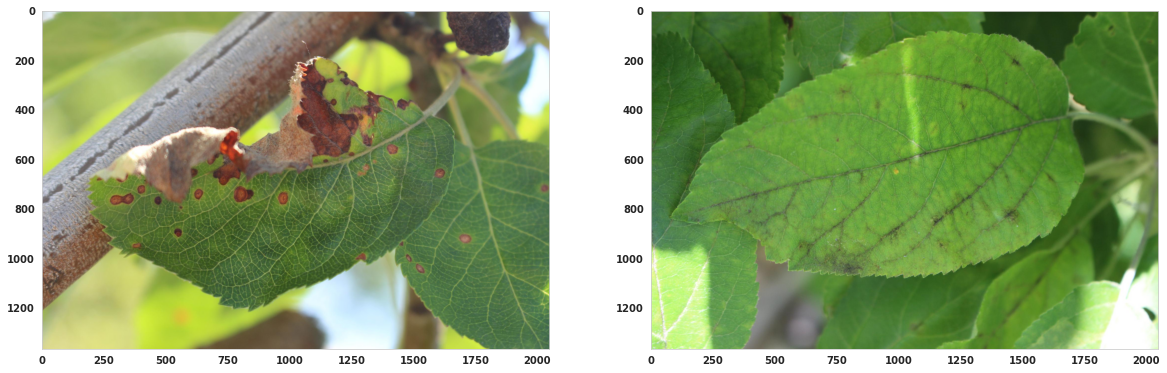

In [51]:
# diseased leaves
import matplotlib.pyplot as plt
plt, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 12))
ax1.imshow(train_images_diseased[0])
ax1.grid(False)
ax2.imshow(train_images_diseased[5])
ax2.grid(False)

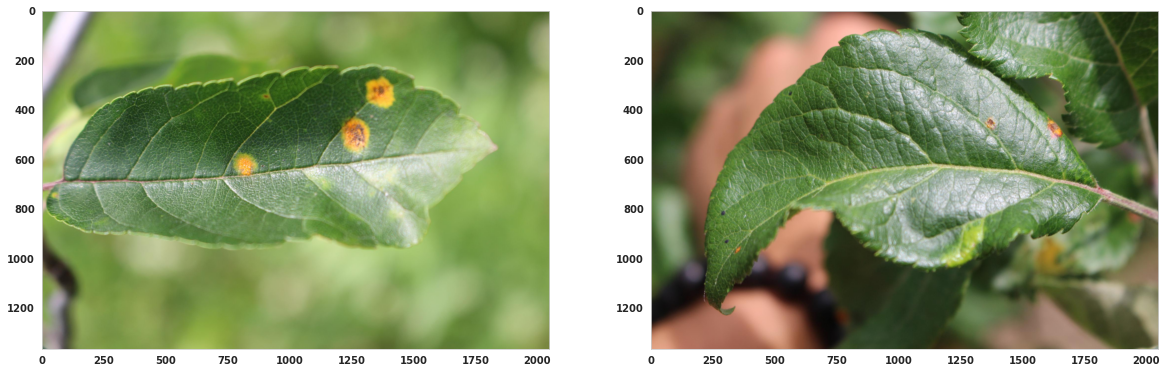

In [52]:
# rust leaves
import matplotlib.pyplot as plt
plt, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 12))
ax1.imshow(train_images_rust[0])
ax1.grid(False)
ax2.imshow(train_images_rust[5])
ax2.grid(False)

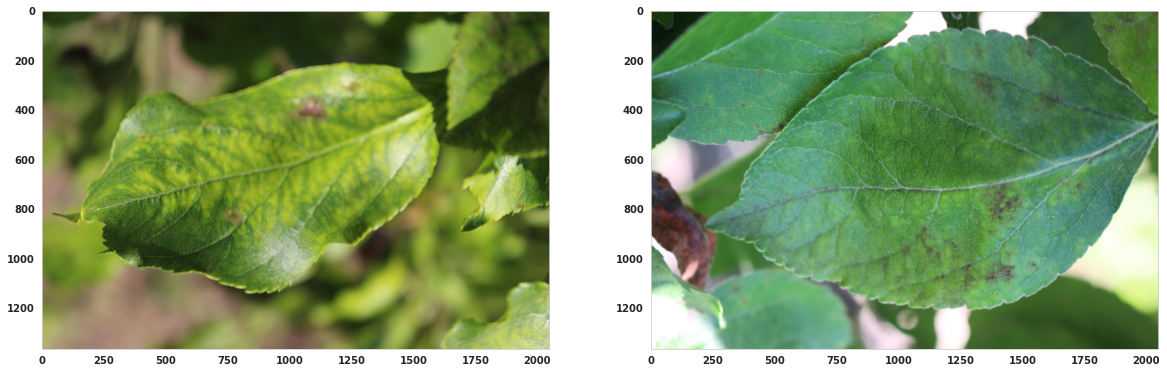

In [53]:
# scab leaves
import matplotlib.pyplot as plt
plt, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 12))
ax1.imshow(train_images_scab[0])
ax1.grid(False)
ax2.imshow(train_images_scab[5])
ax2.grid(False)

####**Inference** :


*   Rust leaves has brownish- yellowish patches
*   Scab leaves have brown stains. 

